In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"E:\ucan open\penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.shape

(344, 7)

# Is this a sample Data or Population data ?
### hint: is this all of the penguins in the world or just a small sample

## Are there any null values in the Dataset

In [4]:
df.isnull().sum(axis=0) #Funding null values through columns

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## Observation
### there are almost 2 null values in 4 columns
### there are 11 null values in sex feature

# How many categories and Numerical Values are there 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 3 category type
## 4 Numeric type values

# A sample of Penguin from Antarctic 

### we have 344 observations which is few and must be difficult to get that many penguins. Howeever there are 20 millions penguins in antarctic 
### 344/20,000,000 which is just 0.0017%

### lets see whats the 2% of our sample

In [6]:
sample_size = int(df.shape[0]*0.02)
sample_size

6

## pretending our dataset as population and we take a small sample lets see how representetive a statistics,the mean is of populaton

In [7]:
body_mass_g_mean = df['body_mass_g'].mean()

In [8]:
body_mass_g_mean

4201.754385964912

## mean of all numerical values

In [9]:
series_mean = df.mean(numeric_only = True)
series_mean

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

# comparing population with sample 

In [10]:
sample1 = df.sample(n=sample_size)
sample2 = df.sample(n=sample_size)
sample3 = df.sample(n=sample_size)

In [11]:
sample1.shape

(6, 7)

In [12]:
sample_mean1 = sample1.mean(numeric_only = True)

In [13]:
sample_mean1

bill_length_mm         48.283333
bill_depth_mm          17.583333
flipper_length_mm     205.500000
body_mass_g          4616.666667
dtype: float64

In [14]:
sample_mean2 = sample2.mean(numeric_only = True)
sample_mean2

bill_length_mm         44.616667
bill_depth_mm          16.883333
flipper_length_mm     206.333333
body_mass_g          4312.500000
dtype: float64

In [15]:
sample_mean3 = sample3.mean(numeric_only = True)
sample_mean3

bill_length_mm         41.483333
bill_depth_mm          18.233333
flipper_length_mm     186.666667
body_mass_g          3395.833333
dtype: float64

In [16]:
df_means = pd.concat([series_mean,sample_mean1,sample_mean2,sample_mean3])
df_means

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
bill_length_mm         48.283333
bill_depth_mm          17.583333
flipper_length_mm     205.500000
body_mass_g          4616.666667
bill_length_mm         44.616667
bill_depth_mm          16.883333
flipper_length_mm     206.333333
body_mass_g          4312.500000
bill_length_mm         41.483333
bill_depth_mm          18.233333
flipper_length_mm     186.666667
body_mass_g          3395.833333
dtype: float64

In [17]:
df_means = pd.concat([series_mean,sample_mean1,sample_mean2,sample_mean3],axis=1)

In [18]:
df_means.columns = ['population', 'sample1' , 'sample2' , 'sample3']

In [19]:
df_means

,population,sample1,sample2,sample3
bill_length_mm,43.921930,48.283333,44.616667,41.483333
bill_depth_mm,17.151170,17.583333,16.883333,18.233333
flipper_length_mm,200.915205,205.500000,206.333333,186.666667
body_mass_g,4201.754386,4616.666667,4312.500000,3395.833333


# how much variation in mean of our sample

In [20]:
df_means = pd.DataFrame()
for _ in range(50):
    df_sample = df.sample(n= sample_size)
    series_mean = df_sample.mean(numeric_only = True)
    df_means = pd.concat([df_means, series_mean])

In [21]:
df_means.shape

(200, 1)

In [22]:
df_means.head()

,0
bill_length_mm,40.616667
bill_depth_mm,18.916667
flipper_length_mm,192.166667
body_mass_g,3766.666667
bill_length_mm,44.833333


# It will sort the mean according to 

In [23]:
df_means

,0
bill_length_mm,40.616667
bill_depth_mm,18.916667
flipper_length_mm,192.166667
body_mass_g,3766.666667
bill_length_mm,44.833333
...,...
body_mass_g,4800.000000
bill_length_mm,45.500000
bill_depth_mm,17.350000
flipper_length_mm,205.833333


In [24]:
df_means = pd.DataFrame()
for _ in range(50):
    df_sample = df.sample(n= sample_size)
    series_mean = df_sample.mean(numeric_only = True)
    df_means = pd.concat([df_means, series_mean],axis = 1)

In [25]:
df_means

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill_length_mm,44.866667,45.783333,43.783333,43.000000,43.600000,44.000000,42.966667,46.000000,39.283333,45.083333,...,42.583333,41.900000,44.150000,46.033333,44.500000,41.166667,43.416667,41.466667,40.483333,43.050000
bill_depth_mm,15.533333,16.350000,18.550000,18.066667,17.866667,18.083333,18.450000,15.500000,17.883333,14.916667,...,16.283333,16.400000,17.666667,16.700000,16.083333,16.900000,18.383333,18.283333,18.433333,17.083333
flipper_length_mm,212.166667,206.166667,196.500000,197.000000,197.833333,193.333333,193.833333,201.500000,190.666667,208.333333,...,198.500000,203.333333,201.166667,205.333333,201.166667,196.000000,200.500000,199.000000,187.333333,193.166667
body_mass_g,4570.833333,4491.666667,3804.166667,3729.166667,4058.333333,3754.166667,3908.333333,4316.666667,4004.166667,4633.333333,...,4450.000000,4308.333333,4033.333333,4695.833333,4295.833333,4037.500000,3929.166667,3941.666667,3733.333333,3791.666667


# Each row is an average of that feature for every sample 
### sampl_size=6

In [26]:
df_means.T

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,44.866667,15.533333,212.166667,4570.833333
0,45.783333,16.350000,206.166667,4491.666667
0,43.783333,18.550000,196.500000,3804.166667
0,43.000000,18.066667,197.000000,3729.166667
0,43.600000,17.866667,197.833333,4058.333333
0,44.000000,18.083333,193.333333,3754.166667
0,42.966667,18.450000,193.833333,3908.333333
0,46.000000,15.500000,201.500000,4316.666667
0,39.283333,17.883333,190.666667,4004.166667
0,45.083333,14.916667,208.333333,4633.333333


In [27]:
import warnings 
warnings.simplefilter('ignore') # for most warnings

In [28]:
df_means = df_means.T

In [29]:
df_means.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,44.866667,15.533333,212.166667,4570.833333
0,45.783333,16.350000,206.166667,4491.666667
0,43.783333,18.550000,196.500000,3804.166667
0,43.000000,18.066667,197.000000,3729.166667
0,43.600000,17.866667,197.833333,4058.333333


# this below error is caused due to improper indexing

In [30]:
# sns.histplot(data = df_means ,x= 'bill_length_mm')

In [31]:
df_means.reset_index(drop=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,44.866667,15.533333,212.166667,4570.833333
1,45.783333,16.350000,206.166667,4491.666667
2,43.783333,18.550000,196.500000,3804.166667
3,43.000000,18.066667,197.000000,3729.166667
4,43.600000,17.866667,197.833333,4058.333333
5,44.000000,18.083333,193.333333,3754.166667
6,42.966667,18.450000,193.833333,3908.333333
7,46.000000,15.500000,201.500000,4316.666667
8,39.283333,17.883333,190.666667,4004.166667
9,45.083333,14.916667,208.333333,4633.333333


In [32]:
df_means = df_means.reset_index(drop=True)

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

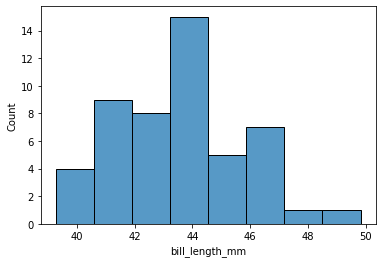

In [33]:
# Create a fresh, unique index and then plot
sns.histplot(data=df_means.reset_index(drop=True), x='bill_length_mm')


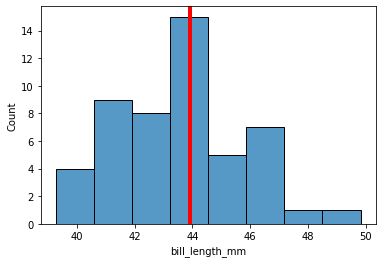

In [34]:
sns.histplot(data=df_means.reset_index(drop=True), x='bill_length_mm')
pop_mean = df['bill_length_mm'].mean()
plt.axvline(pop_mean, color ='red', lw=4)
plt.show()

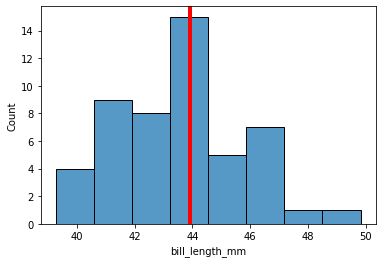

we wre 90% confident that the population mean between 40.40 and 46.86


In [35]:
sns.histplot(data=df_means.reset_index(drop=True), x='bill_length_mm')
pop_mean = df['bill_length_mm'].mean()
plt.axvline(pop_mean, color ='red', lw=4)
plt.show()

min = np.percentile(df_means['bill_length_mm'], 5)
max = np.percentile(df_means['bill_length_mm'], 95)
print(f'we wre 90% confident that the population mean between {min:.2f} and {max:.2f}')

# 1. We don’t know the "True" Mean
## Imagine you want to know the average bill length of every penguin in the world.
## You can't catch them all, so you measure a small group instead.
## That small group gives you one average (the red line in your graph), 
## but it might be slightly higher or lower than the real world average. 


# 2. The "Safety Net" (41.17 to 47.59)
## Instead of just giving one number, we provide a range. We are saying, 
## "We aren't 100% sure of the exact number, but we are very sure the real 
## average for all penguins falls somewhere between 41.17mm and 47.59mm."

# 3. What "90% Confident" actually means
## This is the part that trips people up! It doesn't mean there is a 90% chance the true mean is in this specific range.
## Instead, it means that if we repeated this study 100 times—catching a new group of penguins and calculating a new range every time—90 of those ranges would successfully "trap" the real population average, and 10 would miss it.

## More Confidence = Wider Range (You are playing it safe).
## Less Confidence = Narrower Range (You are being more specific but taking more risk)

# for bill_depth_mm

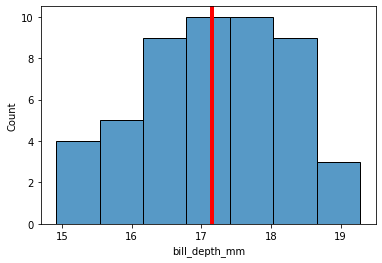

we wre 90% confident that the population mean between 15.52 and 18.64


In [36]:
sns.histplot(data=df_means.reset_index(drop=True), x='bill_depth_mm')
pop_mean = df['bill_depth_mm'].mean()
plt.axvline(pop_mean, color ='red', lw=4)
plt.show()

min = np.percentile(df_means['bill_depth_mm'], 5)
max = np.percentile(df_means['bill_depth_mm'], 95)
print(f'we wre 90% confident that the population mean between {min:.2f} and {max:.2f}')

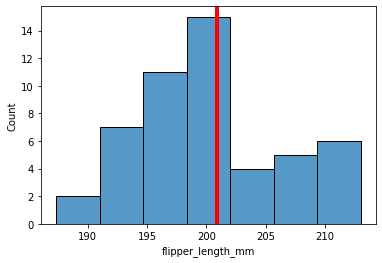

we wre 90% confident that the population mean between 192.48 and 211.94


In [37]:
sns.histplot(data=df_means.reset_index(drop=True), x='flipper_length_mm')
pop_mean = df['flipper_length_mm'].mean()
plt.axvline(pop_mean, color ='red', lw=4)
plt.show()

min = np.percentile(df_means['flipper_length_mm'], 5)
max = np.percentile(df_means['flipper_length_mm'], 95)
print(f'we wre 90% confident that the population mean between {min:.2f} and {max:.2f}')

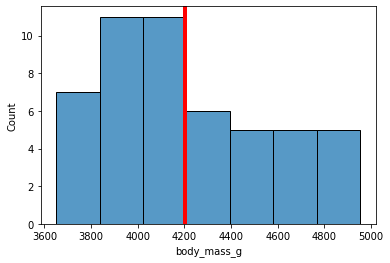

we wre 90% confident that the population mean between 3742.71 and 4816.04


In [38]:
sns.histplot(data=df_means.reset_index(drop=True), x='body_mass_g')
pop_mean = df['body_mass_g'].mean()
plt.axvline(pop_mean, color ='red', lw=4)
plt.show()

min = np.percentile(df_means['body_mass_g'], 5)
max = np.percentile(df_means['body_mass_g'], 95)
print(f'we wre 90% confident that the population mean between {min:.2f} and {max:.2f}')

# confidence is the "bridge" that lets you move from looking at a small group of data (your sample) to making smart guesses about the whole world (the population).

# Stratified sampling

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

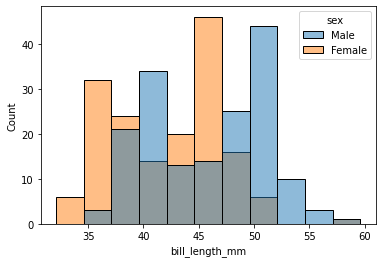

In [40]:
sns.histplot(data=df ,x="bill_length_mm" , hue='sex')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='Count'>

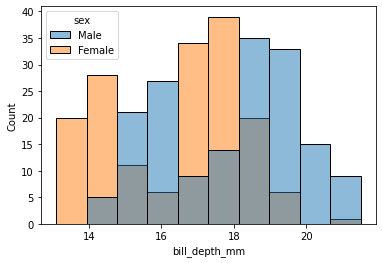

In [41]:
sns.histplot(data=df ,x="bill_depth_mm" , hue='sex')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

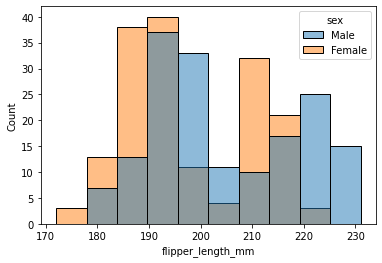

In [42]:
sns.histplot(data=df ,x="flipper_length_mm" , hue='sex')

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

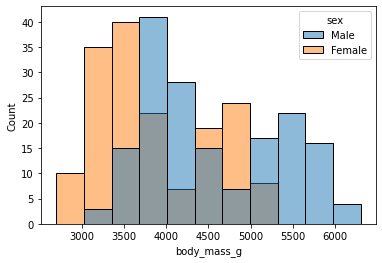

In [43]:
sns.histplot(data=df ,x="body_mass_g" , hue='sex')

## While there is a lot of overlap in the middle, if you picked a random individual from the "heavy" side of the graph, they are much more likely to be male. If you picked one from the "light" side, they are much more likely to be female.

## The grey/darker areas represent where the two groups overlap. This tells us that body mass alone isn't enough to tell the difference between a male and a female.

## "In the overlapping weight ranges, is an individual more likely to be male or female?"

# we are going to solve this problem problem with the help of resampling method

In [44]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [50]:
df_f = df[df['sex']=='Female']
df_f.shape

(165, 7)

In [49]:
df_m = df[df['sex']=='Male']
df_m.shape

(168, 7)

In [47]:
df_means_f = pd.DataFrame()
df_means_m = pd.DataFrame()

In [48]:
sample_size

6

In [51]:
for _ in range(50):
    df_sample_f = df_f.sample(n=sample_size)
    series_means_f = df_sample_f.mean(numeric_only = True)
    df_means_f = pd.concat([df_means_f , series_means_f],axis = 1)

In [52]:
for _ in range(50):
    df_sample_m = df_m.sample(n=sample_size)
    series_means_m = df_sample_m.mean(numeric_only = True)
    df_means_m = pd.concat([df_means_m , series_means_m],axis = 1)

In [53]:
df_means_f.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill_length_mm,42.966667,42.483333,40.916667,42.666667,39.916667,40.316667,39.016667,40.483333,37.683333,39.500000,...,43.150000,42.250000,39.666667,46.500000,38.166667,44.633333,38.616667,42.333333,39.550000,42.333333
bill_depth_mm,16.400000,15.916667,16.783333,14.850000,17.900000,15.516667,16.900000,16.416667,16.783333,16.750000,...,16.133333,16.216667,16.666667,15.566667,16.850000,14.583333,16.766667,16.833333,16.716667,15.950000
flipper_length_mm,194.333333,202.166667,198.166667,205.500000,189.500000,199.333333,190.500000,194.500000,191.500000,192.333333,...,200.000000,196.166667,198.666667,208.333333,187.333333,209.333333,192.666667,191.000000,198.333333,198.333333
body_mass_g,3837.500000,4212.500000,3891.666667,4100.000000,3395.833333,4045.833333,3570.833333,3850.000000,3483.333333,3562.500000,...,4033.333333,3933.333333,3895.833333,4416.666667,3391.666667,4350.000000,3550.000000,3691.666667,3925.000000,4054.166667


In [54]:
df_means_f.shape

(4, 50)

In [55]:
df_means_f = df_means_f.T

In [63]:
df_means_f.shape

(50, 4)

In [57]:
df_means_m.shape

(4, 50)

In [58]:
df_means_m = df_means_m.T

In [65]:
df_means_m.shape

(50, 4)

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

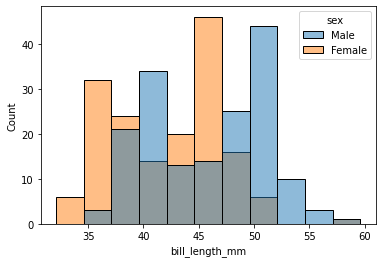

In [72]:
sns.histplot(data=df ,x="bill_length_mm" , hue='sex')

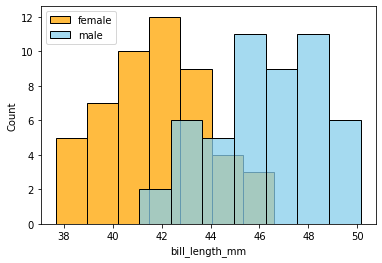

In [74]:
sns.histplot(data = df_means_f.reset_index(drop=True) ,x= 'bill_length_mm' , label = 'female',color = 'orange')
sns.histplot(data = df_means_m.reset_index(drop=True) ,x= 'bill_length_mm' , label = 'male',color = 'skyblue')
plt.legend()
plt.show()

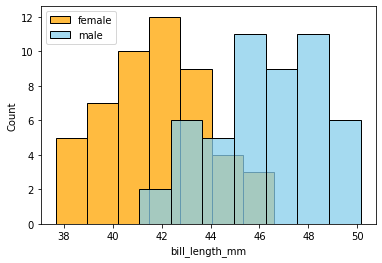

we are 90% confident the Male population mean is between 43.20 and 49.30


In [75]:
sns.histplot(data = df_means_f.reset_index(drop=True) ,x= 'bill_length_mm' , label = 'female',color = 'orange')
sns.histplot(data = df_means_m.reset_index(drop=True) ,x= 'bill_length_mm' , label = 'male',color = 'skyblue')
plt.legend()
plt.show()
min = np.percentile(df_means_m['bill_length_mm'], 5)
max = np.percentile(df_means_m['bill_length_mm'], 95)
print(f'we are 90% confident the Male population mean is between {min:.2f} and {max:.2f}')

#### The Percentile: Ranking the Kids
#### A percentile is just a ranking. If a kid is at the 5th percentile for height, it means they are taller than only 5% of the kids (one of the shortest). If they are at the 95th percentile, they are taller than 95% of the kids (one of the tallest).
#### In your code, you've "lined up" all your calculated average bill lengths from shortest to longest.
#### The 5th percentile marks the spot where the bottom 5% of your results end.
#### The 95th percentile marks the spot where the top 5% of your results begin.
#### The Confidence: Cutting Out the "Outliers"
#### Confidence is how much of the "middle ground" you decide to keep.
#### When you say you are 90% confident, you are saying: "I'm going to ignore the extreme 5% on the very low end and the extreme 5% on the very high end."
#### By chopping off those two 5% "tails," you are left with the middle 90% of your data.
### Putting it Together
### The relation is simple:
### You use percentiles to find the boundaries.
### The distance between those boundaries is your confidence level.
#### If you wanted to be 95% confident, you would have to be even more inclusive. You'd chop off only 2.5% from each side, making your range (the gap between your min and max) wider to ensure you haven't missed the truth.

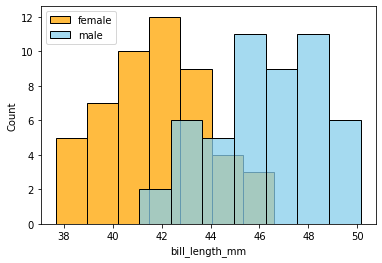

we are 90% confident the Female population mean is between 38.68 and 45.89


In [77]:
sns.histplot(data = df_means_f.reset_index(drop=True) ,x= 'bill_length_mm' , label = 'female',color = 'orange')
sns.histplot(data = df_means_m.reset_index(drop=True) ,x= 'bill_length_mm' , label = 'male',color = 'skyblue')
plt.legend()
plt.show()
min = np.percentile(df_means_f['bill_length_mm'], 5)
max = np.percentile(df_means_f['bill_length_mm'], 95)
print(f'we are 90% confident the Female population mean is between {min:.2f} and {max:.2f}')

### Males are generally larger: Most blue bars are on the right side of the graph, showing that male bills are typically longer, mostly between 45 mm and 50 mm.
### Females are generally smaller: Most orange bars are on the left, meaning female bills are usually shorter, mostly between 38 mm and 44 mm.
### There is some overlap: In the middle area (around 41 mm to 46 mm), there's a mix. A very "large" female can have the same bill length as a "small" male.
### The most common sizes: The "tallest" bars show the most frequent measurements. For females, the most common bill length is around 42 mm, while for males, it's roughly 45 mm or 48 mm

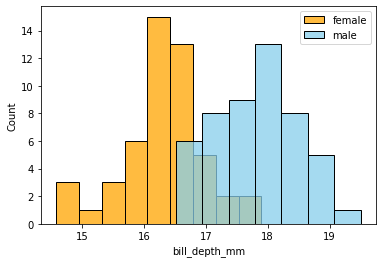

we are 90% confident the Female population mean is between 15.05 and 17.20
we are 90% confident the Male population mean is between 16.83 and 18.96


In [79]:
sns.histplot(data = df_means_f.reset_index(drop=True) ,x= 'bill_depth_mm' , label = 'female',color = 'orange')
sns.histplot(data = df_means_m.reset_index(drop=True) ,x= 'bill_depth_mm' , label = 'male',color = 'skyblue')
plt.legend()
plt.show()
min = np.percentile(df_means_f['bill_depth_mm'], 5)
max = np.percentile(df_means_f['bill_depth_mm'], 95)
print(f'we are 90% confident the Female population mean is between {min:.2f} and {max:.2f}')
min = np.percentile(df_means_m['bill_depth_mm'], 5)
max = np.percentile(df_means_m['bill_depth_mm'], 95)
print(f'we are 90% confident the Male population mean is between {min:.2f} and {max:.2f}')

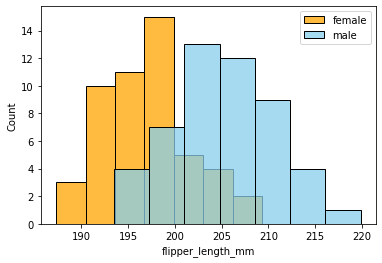

we are 90% confident the Female population mean is between 189.95 and 204.90
we are 90% confident the Male population mean is between 196.39 and 214.18


In [80]:
sns.histplot(data = df_means_f.reset_index(drop=True) ,x= 'flipper_length_mm' , label = 'female',color = 'orange')
sns.histplot(data = df_means_m.reset_index(drop=True) ,x= 'flipper_length_mm' , label = 'male',color = 'skyblue')
plt.legend()
plt.show()
min = np.percentile(df_means_f['flipper_length_mm'], 5)
max = np.percentile(df_means_f['flipper_length_mm'], 95)
print(f'we are 90% confident the Female population mean is between {min:.2f} and {max:.2f}')
min = np.percentile(df_means_m['flipper_length_mm'], 5)
max = np.percentile(df_means_m['flipper_length_mm'], 95)
print(f'we are 90% confident the Male population mean is between {min:.2f} and {max:.2f}')

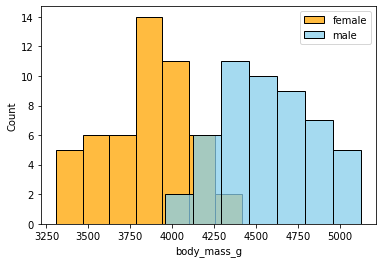

we are 90% confident the Female population mean is between 3393.54 and 4226.25
we are 90% confident the Male population mean is between 4138.12 and 4996.25


In [81]:
sns.histplot(data = df_means_f.reset_index(drop=True) ,x= 'body_mass_g' , label = 'female',color = 'orange')
sns.histplot(data = df_means_m.reset_index(drop=True) ,x= 'body_mass_g' , label = 'male',color = 'skyblue')
plt.legend()
plt.show()
min = np.percentile(df_means_f['body_mass_g'], 5)
max = np.percentile(df_means_f['body_mass_g'], 95)
print(f'we are 90% confident the Female population mean is between {min:.2f} and {max:.2f}')
min = np.percentile(df_means_m['body_mass_g'], 5)
max = np.percentile(df_means_m['body_mass_g'], 95)
print(f'we are 90% confident the Male population mean is between {min:.2f} and {max:.2f}')

# Do our Features have Association ?

In [83]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


### plot of negative (-ve) 25% relation

<AxesSubplot:title={'center':'flipper length by bill length'}, xlabel='bill_depth_mm', ylabel='bill_length_mm'>

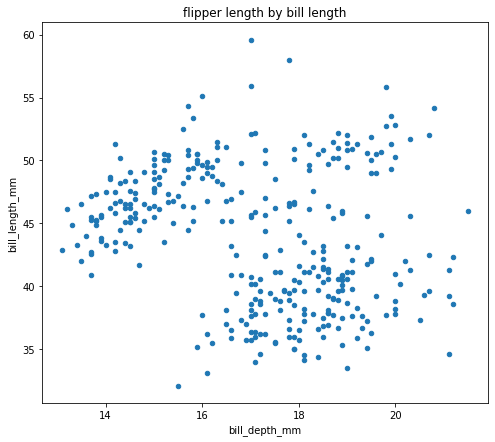

In [85]:
df.plot( kind = 'scatter' , x='bill_depth_mm' , y='bill_length_mm' , title = 'bill depth by bill length' , figsize = (8,7))

#### plot of positive(+ve) 65% relation

<AxesSubplot:title={'center':'flipper length by bill length'}, xlabel='bill_length_mm', ylabel='flipper_length_mm'>

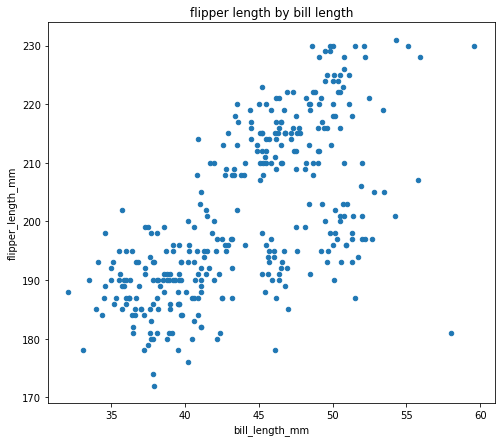

In [87]:
df.plot( kind = 'scatter' , x='bill_length_mm' , y='flipper_length_mm' , title = 'flipper length by bill length' , figsize = (8,7))

In [89]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [90]:
df.groupby(['island','species']).count()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                       
Biscoe    Adelie                 44             44                 44   
          Gentoo                123            123                123   
Dream     Adelie                 56             56                 56   
          Chinstrap              68             68                 68   
Torgersen Adelie                 51             51                 51   

                     body_mass_g  sex  
island    species                      
Biscoe    Adelie              44   44  
          Gentoo             123  119  
Dream     Adelie              56   55  
          Chinstrap           68   68  
Torgersen Adelie              51   47

<AxesSubplot:ylabel='sex'>

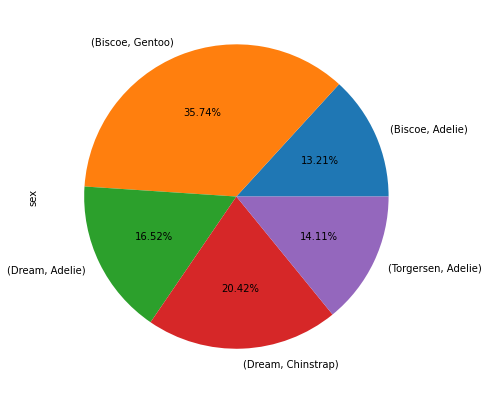

In [92]:
df.groupby(['island','species']).count()['sex'].plot(kind='pie' ,autopct = '%.2f%%', figsize= (8,7)) 

<AxesSubplot:title={'center':'penguin species per islands '}, ylabel='sex'>

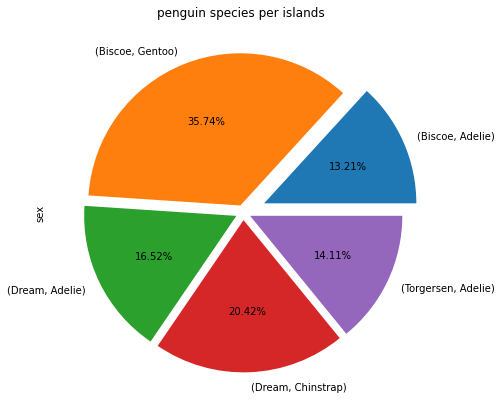

In [93]:
df.groupby(['island','species']).count()['sex'].plot(kind='pie' ,autopct = '%.2f%%',title = 'penguin species per islands ',explode = [.15,.05,.05,.05,.05], figsize= (8,7)) 

#### The Big Winner (Orange Slice): The largest group in this data is Gentoo penguins on Biscoe Island, making up over a third of all the penguins (35.74%).
#### The Smallest Group (Blue Slice): The smallest group is Adelie penguins on Biscoe Island (13.21%).
#### The Others: The rest of the "pie" is split fairly evenly between three other groups:
#### Chinstrap penguins on Dream Island (20.42%).
#### Adelie penguins on Dream Island (16.52%).
#### Adelie penguins on Torgersen Island (14.11%).

Text(0, 0.5, '')

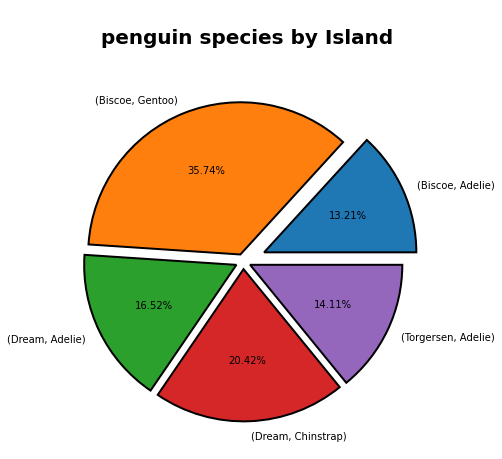

In [94]:
ax = df.groupby(['island','species']).count()['sex'].plot(kind='pie' ,autopct = '%.2f%%',title = 'penguin species per islands ',
                                                     explode = [.15,.05,.05,.05,.05], figsize= (8,7)) 
for w in ax.patches:
    w.set_linewidth(2)
    w.set_edgecolor('black')
plt.title('\n penguin species by Island\n',fontsize = 20 , fontweight = 'bold')
ax.set_ylabel(None)
    